Notebook purpose

- Explore and sense-check tag groups and tags

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("/Users/fgu/dev/projects/entropy")
import entropy.data.cleaners as cl
import entropy.data.creators as cr
import entropy.helpers.aws as aws
import entropy.helpers.data as hd

sns.set_style("whitegrid")
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", None)
pd.set_option("display.max_seq_items", None)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

plotargs = dict(figsize=(10, 4))

In [2]:
dfs, df = hd.read_samples(["777", "XX7"])
hd.inspect(df)

Time for read_sample    : 2.26 seconds
Time for read_sample    : 5.30 minutes
(14,839,981, 31)


,id,date,user_id,amount,desc,merchant,tag_group,tag,user_female,user_postcode,user_registration_date,user_salary_range,user_yob,account_created,account_id,account_last_refreshed,account_provider,account_type,data_warehouse_date_created,data_warehouse_date_last_updated,debit,latest_balance,merchant_business_line,tag_auto,tag_manual,tag_up,updated_flag,ym,balance,income,entropy_sptac
0,1859849,2012-11-05,57,-700.0,faster payments receipt ref mdbremoved,NaN,NaN,NaN,0.0,n8 9,2010-05-13,10k to 20k,1987.0,2012-10-23,274000,2020-08-16 07:24:00,santander,current,2014-07-18,2017-08-15,False,14829.769531,NaN,NaN,NaN,current account,u,201211,8504.292969,22136.039062,2.397678
1,1859848,2012-11-08,57,-900.0,faster payments receipt from mdbremoved,NaN,NaN,NaN,0.0,n8 9,2010-05-13,10k to 20k,1987.0,2012-10-23,274000,2020-08-16 07:24:00,santander,current,2014-07-18,2017-08-15,False,14829.769531,NaN,NaN,NaN,current account,u,201211,9404.292969,22136.039062,2.397678


## Overview

### Tag groups

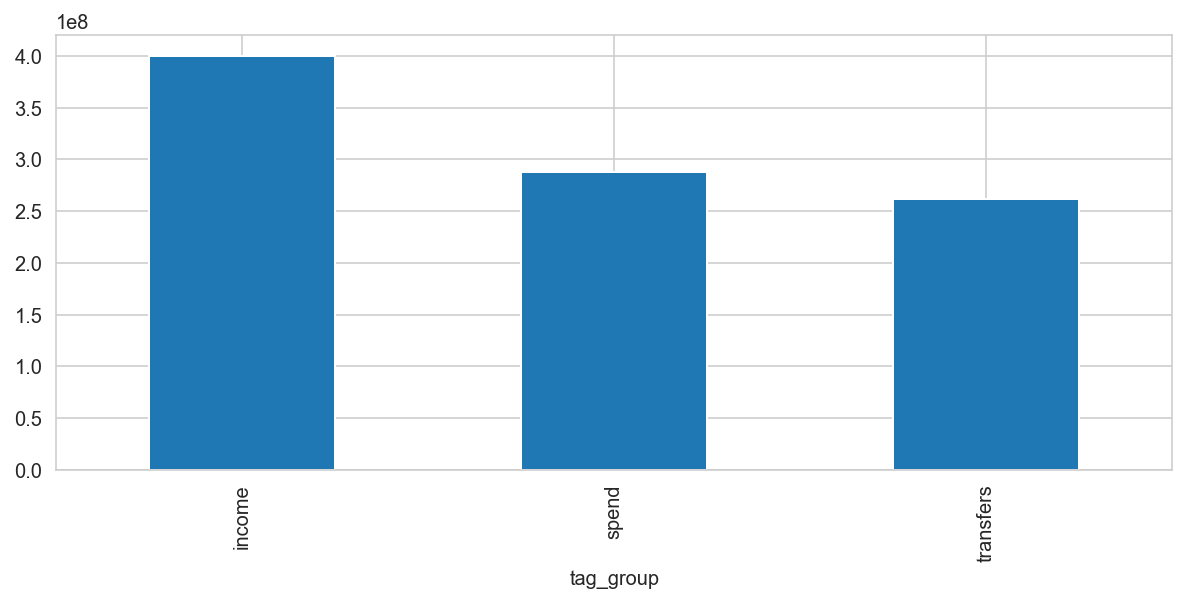

In [3]:
df.groupby("tag_group").amount.sum().abs().plot(kind="bar", **plotargs);

### Tags

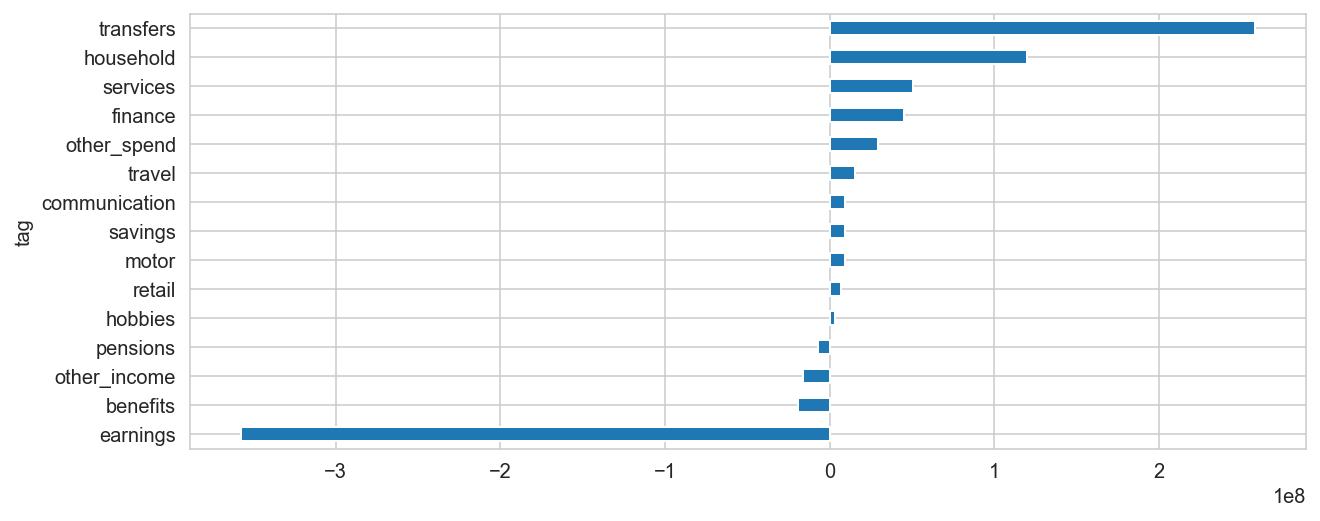

In [4]:
df.groupby("tag", dropna=False).amount.sum().round().sort_values().plot(
    kind="barh", **plotargs
);

## Breakdowns

### Tag groups into tags

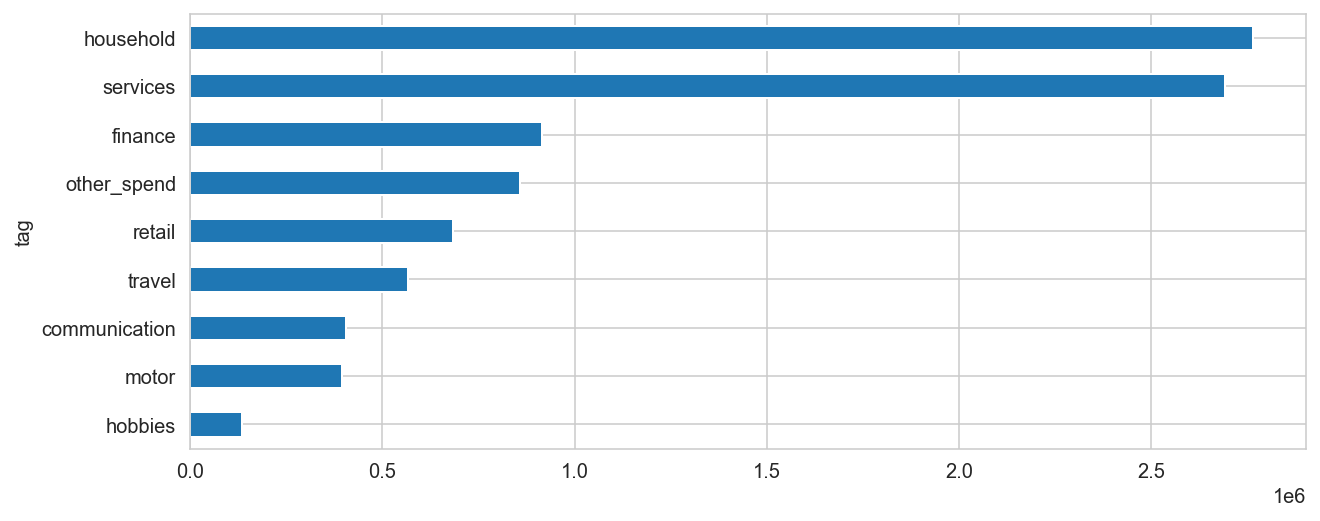

In [6]:
hd.breakdown(df, "tag_group", "spend", "tag", metric="counts", net=False).plot(
    kind="barh", **plotargs
);

### Tags into auto tags

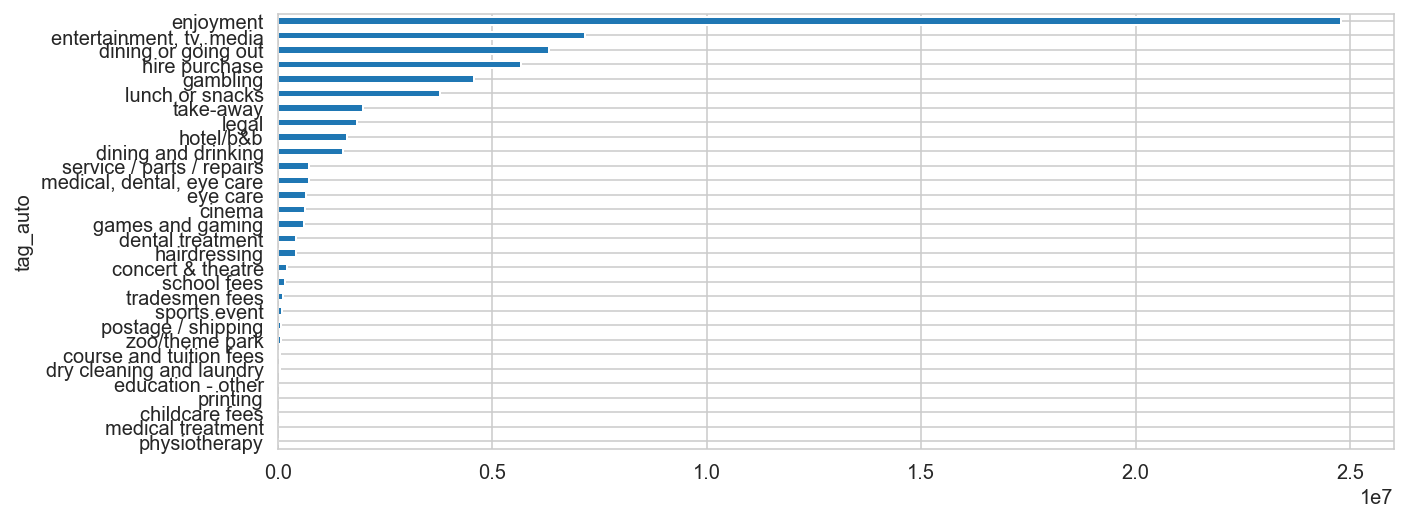

In [7]:
hd.breakdown(df, "tag", "services", "tag_auto", metric="value", net=False).plot(
    kind="barh", **plotargs
);

### Auto tag into merchants

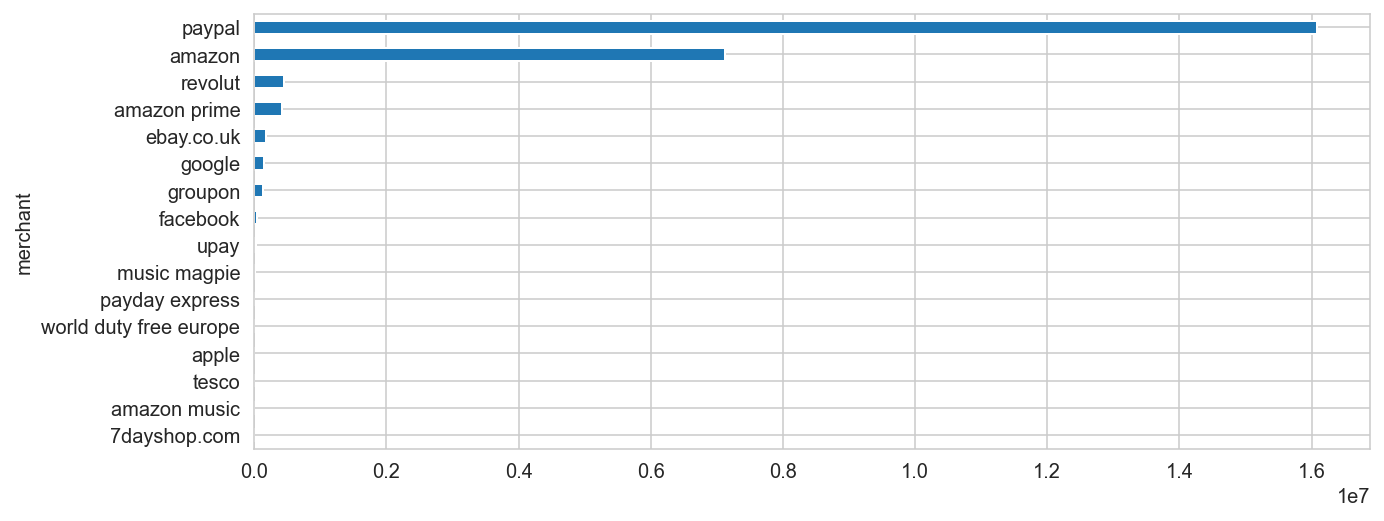

In [9]:
hd.breakdown(df, "tag_auto", "enjoyment", "merchant", metric="value", net=False).iloc[
    :20
].plot(kind="barh", **plotargs);